# Data Mining Project 2
## By Julius Frank
### Comparison of Lexical Distance Between Languages Over Time

## Introduction
[Lexical distance](https://en.wikipedia.org/wiki/Lexical_similarity) is a metric to determine how similar the vocabulary of two languages are. Traditionally studies of lexical distance have focused on very small subset of human languages, even one of the largest, *Ethnologue*'s index of lexical distance. only covers Slavic, Germanic, and Romance languages (all of which are themselves part of the larger Indo-European Language Family). Additionally such metrics depend on comparisions of a very small list of words, called a [Swadesh list](https://en.wikipedia.org/w/index.php?title=Swadesh_list&oldid=965530744), which only include very basic functional words such as "sun", "I", and "sleep." This is because traditional lingusitics classification rely only analysis basic vocabulary so as to not mistake loan-word adoption for a genetic connection between languages. This report aims to investigate a non-traditional form of lexical similarity, that which takes into account how recently words came into usage. Using data scraped from [Merrian-Webster's Time Traveler](https://www.merriam-webster.com/time-traveler), I have classifed 10,000+ words by what century they originated in and compared their translations via google translate. I have found that words that have originated in later centuries tend to be less lexically distance than words originating in earlier centuries, as one would predict given increased globalization.

## Data Gathering Process
The following code was used to generate the `.txt` files from the Time Traveler

In [6]:
import requests
import re
import time

#collects words from https://www.merriam-webster.com/time-traveler/

#most time travler dates are organized by year, but the earliest ones are organized by century so I need to take care of those
urls = ['before%2012th%20century','12th%20century','13th%20century','14th%20century','15th%20century']
for i in range(1500,2021):
    urls.append(str(i))
url_base = 'https://www.merriam-webster.com/time-traveler/'
    
def make_word_var(url_base,urls):
    def get_words(url):
        r = requests.get(url)
        c = str(r.content,encoding='utf-8') #utf-8 handles accented characters
        #words are stored in json-like formats on time travel pages's page source, this regex captures this
        words = re.findall(r'\{\"date\"\:.+?\]\}',c)
        return words
    done = []
    for url in urls:
        words_dicts = get_words(url_base + url)
        time.sleep(1) #please dont ban me I swear I'm not DDoSing you
        # takes about 10 mins to run
        for w in words_dicts:
            date_var_name = w[w.index('\"date\":')+len('\"date\":\"')-1:w.index(',\"total\"')].replace(' ','_').replace('\"','')
            # some webpages will have the words of previous years in the page source, the "done" list avoids double-copying
            if date_var_name not in done:
                # note: there must be a folder called wordbanks in the root to work
                words = w[w.index('[')+1:w.index(']')].replace('\"','').split(',') #captures list
                with open('wordbanks/{0}.txt'.format(date_var_name),'a') as f:
                    for word in words:
                        f.write(word + '\n')
                    f.close()
                    print('Done with',date_var_name)
                done.append(date_var_name)
            else:
                pass

make_word_var(url_base,urls)

Done with before_12th_century
Done with 12th_century
Done with 13th_century
Done with 14th_century
Done with 15th_century
Done with 1500
Done with 1501
Done with 1502
Done with 1503
Done with 1504
Done with 1505
Done with 1506
Done with 1507
Done with 1508
Done with 1509
Done with 1510
Done with 1511
Done with 1512
Done with 1513
Done with 1514
Done with 1515
Done with 1516
Done with 1517
Done with 1518
Done with 1519
Done with 1520
Done with 1521
Done with 1522
Done with 1523
Done with 1524
Done with 1525
Done with 1526
Done with 1527
Done with 1528
Done with 1529
Done with 1530
Done with 1531
Done with 1532
Done with 1533
Done with 1534
Done with 1535
Done with 1536
Done with 1537
Done with 1538
Done with 1539
Done with 1540
Done with 1541
Done with 1542
Done with 1543
Done with 1544
Done with 1545
Done with 1546
Done with 1547
Done with 1548
Done with 1549
Done with 1550
Done with 1551
Done with 1552
Done with 1553
Done with 1554
Done with 1555
Done with 1556
Done with 1557
Done wit

Then the `.txt` files are combined through the following code. It would have been too computationally expective to do an year-by-year comparision, even with sampling.

In [9]:
# making century word lists
for i in range(16,21):
    for j in range(100*(i-1),100*i):
        try:
            with open('wordbanks/' + str(j) + '.txt','r') as f:
                c = f.readlines()
                c = [l.strip() for l in c]
                for d in c:
                    with open('wordbanks/' + str(i) + 'th_century.txt','a') as g:
                        g.write(d + '\n')
                        g.close()
                    f.close()
        except FileNotFoundError:
            pass
    print('Done with {0}th century'.format(i))
# 21st century words combined with 20th century words
for k in range(2000,2021):
    try:
        with open('wordbanks/' + str(k) + '.txt','r') as f:
            c = f.readlines()
            c = [l.strip() for l in c]
            for d in c:
                with open('wordbanks/20th_century.txt','a') as g:
                    g.write(d + '\n')
                    g.close()
                f.close()
    except FileNotFoundError:
        pass
print('Done with 21st century (combined with 20th century)')
#add words that appeared before the 12th century as 12th century words
with open('wordbanks/before_12th_century.txt','r') as f:
    c = f.readlines()
    c = [l.strip() for l in c]
    for d in c:
        with open('wordbanks/12th_century.txt','a') as g:
            g.write(d + '\n')
            g.close
    f.close()
print('Done with before 12th century (combined with 12th century)')

Done with 16th century
Done with 17th century
Done with 18th century
Done with 19th century
Done with 20th century
Done with 21st century (combined with 20th century)
Done with before 12th century (combined with 12th century)


From these century word lists, 1000 words were randomly selected from each and chosen for translation. Even with this reduced count, translation took 5 days in total to complete (granted mining was not occurring all of the time during those 5 days due to errors, restarts, and disconnects). As such, I will not demonstrate the full process for all words, but I will provide a demonstration with one word. The code for automating the mining process can be found in `command.py`.
### Number of words per century

In [2]:
import pandas as pd
# count of words in century banks
cent_num = {}
for file in range(12,21):
    with open('wordbanks/' + str(file) + 'th_century.txt','r') as f:
        words = f.readlines()
    cent_num[file] = len([w.strip() for w in words])
cent_num_df = pd.DataFrame(cent_num,index=['Word count'])
cent_num_df

,12,13,14,15,16,17,18,19,20
Word count,5354,1423,5584,4535,7922,8884,7309,21244,19065


## Metric 
The metric for lexical distance that was used is defined by the result of two algorithms comparing string similarity: the first is [Gestalt Pattern Matching](https://en.wikipedia.org/wiki/Gestalt_Pattern_Matching) who's result is given by $G$ and the second is [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) who's result is given by $L$. Let $W_1$ and $W_2$ of lengths $a$ and $b$ respectively. Our lexical similiarity between $W_1$ and $W_2$, $X$, is given by:
$$X=\min\left(-\log_2\left(\frac{G+\frac{L-a-b}{a+b}}{2}\right),4\right)=\min\left(-\log_2\left(\frac{2K+L-a-b}{2(a+b)}\right),4\right)$$
where $G$ is given by:
$$G=\frac{2K}{a+b}$$
where $K$ is the number of matching characters (the same characters in the same place) and $L$ is given recursively by:
$$L(a,b)=\min[L(a-1,b)+1,L(a,b-1)+1,L(a-1,b-1)+\delta]$$
where $\delta=1$ if the substrings of $W_1$ and $W_2$ are not the same at that point in the recursion, and $\delta=0$ if they are they same.

In layman's terms, $G$ measures the number of times the two strings agree, and $L$ measures the number of edits that need to be made to make the two strings the same. The use of $\log$ allows harsher penalization of further apart words, since the argument inside the $\log$ is always less than or equal to $1$. The $\min$ argument comes from the assumption that if our metric gives a distance higher than $4$, the words should basically be regarded as unrelated. One may interpret this metric as the "difference in information" between two words in bits.
### Languages used
#### Austroasiatic
- Khmer
#### Baltic (Indo-European)
- Lithuanian
#### Bantu (Niger–Congo)
- Swahili
#### Celtic (Indo-European)
- Irish
#### Chadic (Afro-Asiatic)
- Hausa
#### Cushitic (Afro-Asiatic)
- Somali
#### Dravidian
- Tamil
#### Finnic (Uralic)
- Finnish
#### Germanic (Indo-European)
- Danish
- Dutch
- English
- German
- Icelandic
- Swedish
#### Indo-Aryan (Indo-European)
- Hindi
- Punjabi
#### Iranian (Indo-European)
- Kurdish
#### Isolate
- Basque
- Japanese
- Korean
- Mongolian
#### Karluk (Turkic)
- Uzbek
#### Kartvelian
- Georgian
#### Kra–Dai
- Thai
#### Malayic (Austronesian)
- Indonesian
#### Oceanic (Austronesian)
- Maori
#### Oghuz (Turkic)
- Turkish
#### Other Austronesian
- Javanese
- Malagasy
#### Other Indo-European
- Albanian
- Armenian
- Greek
#### Other Uralic
- Hungarian
#### Philippine (Austronesian)
- Filipino
#### Romance (Indo-European)
- French
- Haitian creole
- Italian
- Portuguese
- Romanian
- Spanish
#### Semitic (Afro-Asiatic)
- Amharic
- Arabic
- Maltese
#### Sinitic (Sino-Tibetan)
- Chinese
#### Slavic (Indo-European)
- Bosnian
- Polish
- Russian
- Slovenian
#### Volta–Niger (Niger–Congo)
- Yoruba
### Demonstration: Translation of "water" Into various European Language

In [51]:
import unidecode as udc # https://pypi.org/project/Unidecode/
import pandas as pd
from difflib import SequenceMatcher
import Levenshtein # https://pypi.org/project/python-Levenshtein/
from math import log
import numpy as np
from googletrans import Translator # https://github.com/ssut/py-googletrans
import time
import wordcloseness_constants as wc_con #see wordcloseness_constants.py

def google_translate(lang,word):
    #convert to abbrivations
    if lang not in wc_con.lang_dict.keys():
        lang = wc_con.inv_lang_dict[lang]
    if lang == 'en':
        return word.lower()
    if lang == 'fa': #persian translates extremely badly so don't waste time, but I need to keep the persian columns to keep consistency
    # If I didn't do this it would be spending an hour overall just translating persian
        return 'persian translates extremely badly, see README'
    t = Translator()
    r = t.translate(word,dest=lang,src='en')
    # pronunciation is weird, it's supposed to giver transliteration of non-latin scripts
    # But for languages written in the Latin script, it sometimes gives None and sometimes gives the English word
    # this conditional catches both
    if r.pronunciation != word and r.pronunciation is not None:
        a = udc.unidecode(r.pronunciation)
    else:
        a = udc.unidecode(r.text)
    return a.lower()


def compare_sim(w,y):
    #old leftover from wikitionary code
    if w is None or y is None:
        return None
    ratings = []
    ratings.append(SequenceMatcher(None,w,y).ratio())
    ratings.append(Levenshtein.ratio(w,y))
    rating = sum(ratings)/len(ratings)
    if rating == 0 or rating > 4:
        #I've never seens a rating of 4 or higher naturally, such a rathing would have a ratio of 0.0625 or lower
        #Thus I opt to make 4 the cut off point for complete dissimilarity  
        return 4
    elif rating == 1:
        #will return -0.0 if this is not stated
        return 0
    else:
        # want to penialize farther apart words
        return -log(rating,2)

def gen_comp_matrix(word,langs,include_word=True,p=False,classify=True,include_ruler=True,sleep=1):
    # p is just an option to provide status updates via console
    # ruler, classify, and word include the colonial ruler, language family, and word of the language respectively
    # sleep tells the program to wait sleep seconds between translations, so google doesn't think we're DDoSing them
    word = word.lower()
    if p:
        print('Starting translation of',word)
    num = len(langs)
    A = np.zeros((num,num))
    done = []
    #do translating here to save time
    translated = {}
    for lang in langs:
        if lang not in ('fa','en'): #don't need to sleep for english and persian
            time.sleep(sleep) # please don't ban me
        try:
            r = google_translate(lang,word)
        except:
            try_again = True
            sleep = sleep + 1
            print('Translation failed, increasing sleep time')
            # this part was added after data mining was done
            # it prevents restarting all translations if there is an error
            # as such, it is not included in word_closeness.py which is used in command.py
            while try_again:
                try:
                    print('Translation failed, increasing sleep time')
                    time.sleep(sleep)
                    r = google_translate(lang,word)
                    try_again = False
                except:
                    pass
        translated[lang] = r
        if p:
            print('Done translating',word,'to',wc_con.lang_dict[lang].capitalize(),':',r)
            #check for too many values that are the same as the english word, indicative of falled translations
        if len([i for i in translated.values() if i == word]) > 15:
            print('skipping',word,'too many similar words')
            return None
    #check for too many simular values, indicative of falled translations
    if p:
        print('Comparing',word,'in different languages',end='')
    for n in range(num):
        for m in range(num):
            if n == m or m in done:
                continue
            else:
                # This cuts computation time by about half by filling both entries at once
                rating = compare_sim(translated[langs[n]],translated[langs[m]])
                A[n][m] = A[m][n] = rating
                if n not in done:
                    done.append(n)
                if p:
                    print('.',end='')
    if p:
        print()
        print('Finished comparing',word,end='!\n')
    labels = [wc_con.lang_dict[l] for l in langs]
    # want to add language family information?
    if not any([include_word,classify,include_ruler]):
        return pd.DataFrame(data=A,index=labels,columns=labels)
    else:
        df = pd.DataFrame(data=A,index=labels,columns=labels)
        #want to include the word?
        if include_word:
            df['word'] = [translated[l] for l in langs]
        # want to add language family information?  
        if classify:
            df['classification'] = [wc_con.lang_fam_dict[l] for l in langs]
        # want to add colonial ruler information?
        if include_ruler:
            df['ruler'] = [wc_con.lang_ruler_dict_main[l] for l in langs]
        return df

In [52]:
languages = ('french','spanish','russian','polish','german','english')
languages = [wc_con.inv_lang_dict[l] for l in languages] # convert to abbrivation
sleep = 1 # translations fail if they are too close to each other
# sometimes it will just refuse to work even with a minute of sleep time, in which case restart the
# program
water = gen_comp_matrix('water',languages,p=True,sleep=sleep)
    

Starting translation of water
Translation failed, increasing sleep time
Translation failed, increasing sleep time
Done translating water to French : eau
Translation failed, increasing sleep time
Translation failed, increasing sleep time
Done translating water to Spanish : agua
Done translating water to Russian : voda
Translation failed, increasing sleep time
Translation failed, increasing sleep time
Translation failed, increasing sleep time
Translation failed, increasing sleep time
Done translating water to Polish : woda
Done translating water to German : wasser
Done translating water to English : water
Comparing water in different languages...............
Finished comparing water!


In [53]:
water

,french,spanish,russian,polish,german,english,word,classification,ruler
french,0.000000,0.807355,1.807355,1.807355,2.169925,2.000000,eau,Romance (Indo-European),France
spanish,0.807355,0.000000,2.000000,2.000000,2.321928,2.169925,agua,Romance (Indo-European),Spain
russian,1.807355,2.000000,0.000000,0.415037,2.321928,2.169925,voda,Slavic (Indo-European),Russia
polish,1.807355,2.000000,0.415037,0.000000,1.321928,1.169925,woda,Slavic (Indo-European),Russia
german,2.169925,2.321928,2.321928,1.321928,0.000000,0.459432,wasser,Germanic (Indo-European),Germany
english,2.000000,2.169925,2.169925,1.169925,0.459432,0.000000,water,Germanic (Indo-European),Britain


We then combine the 9000 `.csv` files into one file for their respective century. Note this can't be done in the repository, due to lacking the individual `.csv`

In [8]:
import os
# making main csvs
for c in range(12,21):
    words = os.listdir(str(c)+'/')
    for word, n in zip(words,range(len(words))):
        if n == 0:
            century_df = pd.read_csv(str(c)+'/'+word,index_col=0).iloc[:, range(50)].drop('persian').drop('persian', axis=1)
        else:
            century_df += pd.read_csv(str(c)+'/'+word,index_col=0).iloc[:, range(50)].drop('persian').drop('persian', axis=1)
        print('Done reading',str(c)+'/'+word)
    century_df.to_csv(str(c)+'.csv')

Done reading 12/aback.csv
Done reading 12/about.csv
Done reading 12/ache.csv
Done reading 12/Advent.csv
Done reading 12/affright.csv
Done reading 12/afore.csv
Done reading 12/after.csv
Done reading 12/ale.csv
Done reading 12/all.csv
Done reading 12/Almighty.csv
Done reading 12/almost.csv
Done reading 12/also.csv
Done reading 12/always.csv
Done reading 12/anchor.csv
Done reading 12/anvil.csv
Done reading 12/ape.csv
Done reading 12/apocalypse.csv
Done reading 12/apostle.csv
Done reading 12/April.csv
Done reading 12/arbalest.csv
Done reading 12/archbishopric.csv
Done reading 12/aright.csv
Done reading 12/ark.csv
Done reading 12/arm.csv
Done reading 12/as though.csv
Done reading 12/ask.csv
Done reading 12/away.csv
Done reading 12/bale.csv
Done reading 12/baleful.csv
Done reading 12/balsam.csv
Done reading 12/band.csv
Done reading 12/bare.csv
Done reading 12/barefoot.csv
Done reading 12/bark.csv
Done reading 12/barn.csv
Done reading 12/barrow.csv
Done reading 12/bast.csv
Done reading 12/be.

Done reading 12/goad.csv
Done reading 12/goddaughter.csv
Done reading 12/godmother.csv
Done reading 12/good deal.csv
Done reading 12/goodness.csv
Done reading 12/goose.csv
Done reading 12/grace.csv
Done reading 12/grave.csv
Done reading 12/gray.csv
Done reading 12/graze.csv
Done reading 12/greedy.csv
Done reading 12/Greek.csv
Done reading 12/greyhound.csv
Done reading 12/grind.csv
Done reading 12/grip.csv
Done reading 12/groan.csv
Done reading 12/ground.csv
Done reading 12/groundsel.csv
Done reading 12/guilty.csv
Done reading 12/gut.csv
Done reading 12/ha.csv
Done reading 12/hail.csv
Done reading 12/hailstone.csv
Done reading 12/hair.csv
Done reading 12/hall.csv
Done reading 12/hallowed.csv
Done reading 12/halter.csv
Done reading 12/hand ax.csv
Done reading 12/handcraft.csv
Done reading 12/handed.csv
Done reading 12/handful.csv
Done reading 12/handiwork.csv
Done reading 12/handle.csv
Done reading 12/handling.csv
Done reading 12/hanging.csv
Done reading 12/harbor.csv
Done reading 12/har

Done reading 12/rainy.csv
Done reading 12/rake.csv
Done reading 12/rat.csv
Done reading 12/raw.csv
Done reading 12/reader.csv
Done reading 12/red clover.csv
Done reading 12/red.csv
Done reading 12/reins.csv
Done reading 12/reive.csv
Done reading 12/rend.csv
Done reading 12/rent.csv
Done reading 12/rest.csv
Done reading 12/restless.csv
Done reading 12/rib.csv
Done reading 12/richly.csv
Done reading 12/rick.csv
Done reading 12/riddle.csv
Done reading 12/ride.csv
Done reading 12/ridge.csv
Done reading 12/rife.csv
Done reading 12/ring finger.csv
Done reading 12/ringed.csv
Done reading 12/rise.csv
Done reading 12/rod.csv
Done reading 12/roe deer.csv
Done reading 12/roof.csv
Done reading 12/roost.csv
Done reading 12/root.csv
Done reading 12/rope.csv
Done reading 12/rose.csv
Done reading 12/rot.csv
Done reading 12/rough.csv
Done reading 12/row.csv
Done reading 12/rowing.csv
Done reading 12/ruin.csv
Done reading 12/run away.csv
Done reading 12/running.csv
Done reading 12/rust.csv
Done reading 

Done reading 12/whistle.csv
Done reading 12/white clover.csv
Done reading 12/white.csv
Done reading 12/whiteness.csv
Done reading 12/whiting.csv
Done reading 12/whoredom.csv
Done reading 12/whose.csv
Done reading 12/wick.csv
Done reading 12/widow.csv
Done reading 12/wife.csv
Done reading 12/wild.csv
Done reading 12/wildfire.csv
Done reading 12/wildwood.csv
Done reading 12/will.csv
Done reading 12/willow.csv
Done reading 12/wink.csv
Done reading 12/winnow.csv
Done reading 12/winter.csv
Done reading 12/wintry.csv
Done reading 12/wire.csv
Done reading 12/wisdom.csv
Done reading 12/wise man.csv
Done reading 12/wish.csv
Done reading 12/wite.csv
Done reading 12/witenagemot.csv
Done reading 12/with.csv
Done reading 12/without.csv
Done reading 12/witless.csv
Done reading 12/wive.csv
Done reading 12/woe.csv
Done reading 12/wonder.csv
Done reading 12/wood.csv
Done reading 12/woodbine.csv
Done reading 12/woodland.csv
Done reading 12/woolen.csv
Done reading 12/word.csv
Done reading 12/wordy.csv
Do

Done reading 13/deserve.csv
Done reading 13/desire.csv
Done reading 13/destroy.csv
Done reading 13/devise.csv
Done reading 13/devotion.csv
Done reading 13/devout.csv
Done reading 13/dewdrop.csv
Done reading 13/diadem.csv
Done reading 13/diet.csv
Done reading 13/dignity.csv
Done reading 13/dike.csv
Done reading 13/dine.csv
Done reading 13/dinner.csv
Done reading 13/dirge.csv
Done reading 13/dirt.csv
Done reading 13/discipline.csv
Done reading 13/discomfit.csv
Done reading 13/discord.csv
Done reading 13/dishonor.csv
Done reading 13/dispraise.csv
Done reading 13/distinction.csv
Done reading 13/distress.csv
Done reading 13/doleful.csv
Done reading 13/double.csv
Done reading 13/doubt.csv
Done reading 13/dove.csv
Done reading 13/dozen.csv
Done reading 13/draft.csv
Done reading 13/dragon.csv
Done reading 13/draw off.csv
Done reading 13/dreadful.csv
Done reading 13/dream.csv
Done reading 13/dromedary.csv
Done reading 13/droop.csv
Done reading 13/dropsy.csv
Done reading 13/dull.csv
Done reading

Done reading 13/misunderstand.csv
Done reading 13/moan.csv
Done reading 13/monument.csv
Done reading 13/more and more.csv
Done reading 13/more or less.csv
Done reading 13/mountain.csv
Done reading 13/mouse-ear.csv
Done reading 13/move.csv
Done reading 13/much.csv
Done reading 13/muck.csv
Done reading 13/mule.csv
Done reading 13/multiply.csv
Done reading 13/music.csv
Done reading 13/mustard.csv
Done reading 13/mutton.csv
Done reading 13/nay.csv
Done reading 13/near.csv
Done reading 13/New Year.csv
Done reading 13/nightingale.csv
Done reading 13/ninth.csv
Done reading 13/noble.csv
Done reading 13/nobleman.csv
Done reading 13/noblewoman.csv
Done reading 13/not.csv
Done reading 13/note.csv
Done reading 13/November.csv
Done reading 13/noway.csv
Done reading 13/nutshell.csv
Done reading 13/obedience.csv
Done reading 13/obedient.csv
Done reading 13/observance.csv
Done reading 13/odor.csv
Done reading 13/office.csv
Done reading 13/oil.csv
Done reading 13/Old English.csv
Done reading 13/opening

Done reading 13/tenth.csv
Done reading 13/term.csv
Done reading 13/their.csv
Done reading 13/themselves.csv
Done reading 13/therefrom.csv
Done reading 13/thereupon.csv
Done reading 13/they.csv
Done reading 13/thoughtful.csv
Done reading 13/thresher.csv
Done reading 13/thrice.csv
Done reading 13/thrift.csv
Done reading 13/thrive.csv
Done reading 13/throe.csv
Done reading 13/throne.csv
Done reading 13/throughout.csv
Done reading 13/throw down.csv
Done reading 13/thrust.csv
Done reading 13/thwart.csv
Done reading 13/tidy.csv
Done reading 13/tomb.csv
Done reading 13/tomorrow.csv
Done reading 13/torch.csv
Done reading 13/torment.csv
Done reading 13/tournament.csv
Done reading 13/towel.csv
Done reading 13/trail.csv
Done reading 13/traitor.csv
Done reading 13/travail.csv
Done reading 13/treachery.csv
Done reading 13/treasure house.csv
Done reading 13/trespass.csv
Done reading 13/trestle.csv
Done reading 13/tribe.csv
Done reading 13/tribulation.csv
Done reading 13/Trinity.csv
Done reading 13/t

Done reading 14/citation.csv
Done reading 14/citrine.csv
Done reading 14/civil.csv
Done reading 14/clad.csv
Done reading 14/clary sage.csv
Done reading 14/cleavers.csv
Done reading 14/clime.csv
Done reading 14/closure.csv
Done reading 14/coagulation.csv
Done reading 14/coast.csv
Done reading 14/coat.csv
Done reading 14/cockatrice.csv
Done reading 14/cockcrow.csv
Done reading 14/coin.csv
Done reading 14/collateral.csv
Done reading 14/collation.csv
Done reading 14/colony.csv
Done reading 14/come about.csv
Done reading 14/come in.csv
Done reading 14/comedy.csv
Done reading 14/comer.csv
Done reading 14/commission.csv
Done reading 14/community.csv
Done reading 14/companion.csv
Done reading 14/compel.csv
Done reading 14/compendious.csv
Done reading 14/compensation.csv
Done reading 14/complaint.csv
Done reading 14/compress.csv
Done reading 14/concord.csv
Done reading 14/concourse.csv
Done reading 14/concrete.csv
Done reading 14/concubinage.csv
Done reading 14/concupiscence.csv
Done reading 14

Done reading 14/husbandman.csv
Done reading 14/idea.csv
Done reading 14/imagine.csv
Done reading 14/imitation.csv
Done reading 14/immaterial.csv
Done reading 14/immeasurable.csv
Done reading 14/immortal.csv
Done reading 14/immortality.csv
Done reading 14/implead.csv
Done reading 14/imply.csv
Done reading 14/inbreathe.csv
Done reading 14/inclination.csv
Done reading 14/income.csv
Done reading 14/incontinent.csv
Done reading 14/incorporate.csv
Done reading 14/incurable.csv
Done reading 14/indent.csv
Done reading 14/indictment.csv
Done reading 14/indigestion.csv
Done reading 14/indignation.csv
Done reading 14/indivisible.csv
Done reading 14/induction.csv
Done reading 14/indulgence.csv
Done reading 14/indurate.csv
Done reading 14/indwell.csv
Done reading 14/ineffable.csv
Done reading 14/inestimable.csv
Done reading 14/infect.csv
Done reading 14/infinite.csv
Done reading 14/ingratitude.csv
Done reading 14/iniquity.csv
Done reading 14/injury.csv
Done reading 14/injustice.csv
Done reading 14/

Done reading 14/reproach.csv
Done reading 14/reprobation.csv
Done reading 14/request.csv
Done reading 14/resolution.csv
Done reading 14/respect.csv
Done reading 14/restoration.csv
Done reading 14/restorative.csv
Done reading 14/resurrection.csv
Done reading 14/retailing.csv
Done reading 14/retreat.csv
Done reading 14/retribution.csv
Done reading 14/retrograde.csv
Done reading 14/revel.csv
Done reading 14/reverence.csv
Done reading 14/reverent.csv
Done reading 14/riding.csv
Done reading 14/ringing.csv
Done reading 14/rinse.csv
Done reading 14/roset.csv
Done reading 14/roundtable.csv
Done reading 14/royal.csv
Done reading 14/rubble.csv
Done reading 14/ruddle.csv
Done reading 14/ruler.csv
Done reading 14/safe.csv
Done reading 14/Sagittarius.csv
Done reading 14/Saint Anthony's fire.csv
Done reading 14/salutation.csv
Done reading 14/salute.csv
Done reading 14/sanctify.csv
Done reading 14/saying.csv
Done reading 14/scale.csv
Done reading 14/scallion.csv
Done reading 14/scalp.csv
Done reading

Done reading 15/adventurer.csv
Done reading 15/adversative.csv
Done reading 15/advert.csv
Done reading 15/advertisement.csv
Done reading 15/advised.csv
Done reading 15/aflame.csv
Done reading 15/afresh.csv
Done reading 15/agate.csv
Done reading 15/aged.csv
Done reading 15/agility.csv
Done reading 15/agitate.csv
Done reading 15/alack.csv
Done reading 15/alarm.csv
Done reading 15/alienate.csv
Done reading 15/all right.csv
Done reading 15/allure.csv
Done reading 15/alphabet.csv
Done reading 15/alternation.csv
Done reading 15/amass.csv
Done reading 15/amity.csv
Done reading 15/ammoniac.csv
Done reading 15/analogy.csv
Done reading 15/anatomize.csv
Done reading 15/anciently.csv
Done reading 15/anfractuous.csv
Done reading 15/animal spirits.csv
Done reading 15/annuity.csv
Done reading 15/applaud.csv
Done reading 15/apposition.csv
Done reading 15/apprehend.csv
Done reading 15/arbitration.csv
Done reading 15/arithmetic.csv
Done reading 15/arrive.csv
Done reading 15/arrogant.csv
Done reading 15/

Done reading 15/fatly.csv
Done reading 15/featured.csv
Done reading 15/fidelity.csv
Done reading 15/firepit.csv
Done reading 15/firstly.csv
Done reading 15/fishwife.csv
Done reading 15/fishy.csv
Done reading 15/fistulous.csv
Done reading 15/fitting.csv
Done reading 15/flick.csv
Done reading 15/floweret.csv
Done reading 15/following.csv
Done reading 15/foolishness.csv
Done reading 15/forebear.csv
Done reading 15/foreigner.csv
Done reading 15/foreleg.csv
Done reading 15/foreman.csv
Done reading 15/forenoon.csv
Done reading 15/foreordained.csv
Done reading 15/foretaste.csv
Done reading 15/forged.csv
Done reading 15/formative.csv
Done reading 15/forme.csv
Done reading 15/forwards.csv
Done reading 15/fragment.csv
Done reading 15/freckled.csv
Done reading 15/frequent.csv
Done reading 15/friendliness.csv
Done reading 15/frivolous.csv
Done reading 15/fruiterer.csv
Done reading 15/fulgent.csv
Done reading 15/funeral.csv
Done reading 15/funnel.csv
Done reading 15/furtherance.csv
Done reading 15/

Done reading 15/pang.csv
Done reading 15/parent.csv
Done reading 15/paring knife.csv
Done reading 15/part and parcel.csv
Done reading 15/partition.csv
Done reading 15/passionate.csv
Done reading 15/passionately.csv
Done reading 15/pastry.csv
Done reading 15/patroness.csv
Done reading 15/paucity.csv
Done reading 15/pearly.csv
Done reading 15/peasant.csv
Done reading 15/peep.csv
Done reading 15/peevish.csv
Done reading 15/penalty.csv
Done reading 15/per diem.csv
Done reading 15/percussion.csv
Done reading 15/perjure.csv
Done reading 15/permanently.csv
Done reading 15/permeable.csv
Done reading 15/perpetuity.csv
Done reading 15/perplexed.csv
Done reading 15/persuade.csv
Done reading 15/persuasive.csv
Done reading 15/petticoat.csv
Done reading 15/piled.csv
Done reading 15/pious.csv
Done reading 15/planking.csv
Done reading 15/plating.csv
Done reading 15/plentiful.csv
Done reading 15/plumed.csv
Done reading 15/poetical.csv
Done reading 15/politic.csv
Done reading 15/pompous.csv
Done reading

Done reading 15/ugsome.csv
Done reading 15/umpire.csv
Done reading 15/unassigned.csv
Done reading 15/unbaptized.csv
Done reading 15/unbearable.csv
Done reading 15/unblemished.csv
Done reading 15/unbrace.csv
Done reading 15/unbridle.csv
Done reading 15/unclipped.csv
Done reading 15/uncoined.csv
Done reading 15/undaunted.csv
Done reading 15/undetermined.csv
Done reading 15/undisguised.csv
Done reading 15/undivided.csv
Done reading 15/unemployed.csv
Done reading 15/ungarnished.csv
Done reading 15/ungotten.csv
Done reading 15/unison.csv
Done reading 15/unless.csv
Done reading 15/unlikelihood.csv
Done reading 15/unload.csv
Done reading 15/unmarked.csv
Done reading 15/unmeet.csv
Done reading 15/unpack.csv
Done reading 15/unpleasant.csv
Done reading 15/unpleasing.csv
Done reading 15/unpronounced.csv
Done reading 15/unrehearsed.csv
Done reading 15/unseasonable.csv
Done reading 15/unsightly.csv
Done reading 15/unspent.csv
Done reading 15/unstinted.csv
Done reading 15/untreated.csv
Done reading 

Done reading 16/corn salad.csv
Done reading 16/corpulence.csv
Done reading 16/corrective.csv
Done reading 16/correspondency.csv
Done reading 16/corrugation.csv
Done reading 16/cottony.csv
Done reading 16/cotyledon.csv
Done reading 16/countermine.csv
Done reading 16/countless.csv
Done reading 16/country gentleman.csv
Done reading 16/couplement.csv
Done reading 16/coupler.csv
Done reading 16/couplet.csv
Done reading 16/coursing.csv
Done reading 16/courtship.csv
Done reading 16/courtyard.csv
Done reading 16/cow parsnip.csv
Done reading 16/crackle.csv
Done reading 16/credulous.csv
Done reading 16/crestfallen.csv
Done reading 16/crinkle.csv
Done reading 16/crop-eared.csv
Done reading 16/crossbearer.csv
Done reading 16/crossways.csv
Done reading 16/crotch.csv
Done reading 16/crucifer.csv
Done reading 16/cumulate.csv
Done reading 16/cupboard.csv
Done reading 16/customarily.csv
Done reading 16/cutthroat.csv
Done reading 16/dabble.csv
Done reading 16/damning.csv
Done reading 16/dastardly.csv
Do

Done reading 16/iterate.csv
Done reading 16/its.csv
Done reading 16/janissary.csv
Done reading 16/jersey.csv
Done reading 16/jest.csv
Done reading 16/joggle.csv
Done reading 16/jovial.csv
Done reading 16/Jubilate.csv
Done reading 16/jug.csv
Done reading 16/June.csv
Done reading 16/kitchen garden.csv
Done reading 16/laconism.csv
Done reading 16/lady's mantle.csv
Done reading 16/lady's-smock.csv
Done reading 16/lag.csv
Done reading 16/lakeside.csv
Done reading 16/lamb's lettuce.csv
Done reading 16/landscape.csv
Done reading 16/languid.csv
Done reading 16/lapse.csv
Done reading 16/lated.csv
Done reading 16/latinity.csv
Done reading 16/laughing matter.csv
Done reading 16/laureate.csv
Done reading 16/lazybones.csv
Done reading 16/legionnaire.csv
Done reading 16/lengthwise.csv
Done reading 16/libelant.csv
Done reading 16/licentious.csv
Done reading 16/life-giving.csv
Done reading 16/lifeblood.csv
Done reading 16/limp.csv
Done reading 16/liturgy.csv
Done reading 16/lobby.csv
Done reading 16/l

Done reading 16/sedentary.csv
Done reading 16/seduction.csv
Done reading 16/sedulity.csv
Done reading 16/sedulous.csv
Done reading 16/self-born.csv
Done reading 16/self-consuming.csv
Done reading 16/self-devouring.csv
Done reading 16/self-flattery.csv
Done reading 16/self-taught.csv
Done reading 16/selfness.csv
Done reading 16/senseful.csv
Done reading 16/settle.csv
Done reading 16/shiny.csv
Done reading 16/shirtsleeve.csv
Done reading 16/shoal.csv
Done reading 16/short of.csv
Done reading 16/sickish.csv
Done reading 16/side chair.csv
Done reading 16/sightly.csv
Done reading 16/signifier.csv
Done reading 16/silver age.csv
Done reading 16/silverly.csv
Done reading 16/simple vow.csv
Done reading 16/single combat.csv
Done reading 16/single-handed.csv
Done reading 16/singularize.csv
Done reading 16/sinistrous.csv
Done reading 16/skinful.csv
Done reading 16/slashing.csv
Done reading 16/sleepyhead.csv
Done reading 16/slot.csv
Done reading 16/snaky.csv
Done reading 16/sneak.csv
Done reading 1

Done reading 17/anachronism.csv
Done reading 17/analeptic.csv
Done reading 17/analogous.csv
Done reading 17/analyzation.csv
Done reading 17/angle of reflection.csv
Done reading 17/angular velocity.csv
Done reading 17/anneal.csv
Done reading 17/antagonistic.csv
Done reading 17/antelope.csv
Done reading 17/antenna.csv
Done reading 17/anteroom.csv
Done reading 17/anthology.csv
Done reading 17/anticipatory.csv
Done reading 17/antipyretic.csv
Done reading 17/antiquarian.csv
Done reading 17/apocalyptic.csv
Done reading 17/apologist.csv
Done reading 17/apostrophize.csv
Done reading 17/Arabism.csv
Done reading 17/archducal.csv
Done reading 17/arguable.csv
Done reading 17/arid.csv
Done reading 17/arrowy.csv
Done reading 17/associated.csv
Done reading 17/atmosphere.csv
Done reading 17/atomism.csv
Done reading 17/atrocious.csv
Done reading 17/attic.csv
Done reading 17/atticism.csv
Done reading 17/attributive.csv
Done reading 17/attrited.csv
Done reading 17/authenticate.csv
Done reading 17/avoirdu

Done reading 17/experiential.csv
Done reading 17/explanatory.csv
Done reading 17/exporter.csv
Done reading 17/expository.csv
Done reading 17/extemporaneous.csv
Done reading 17/extensor.csv
Done reading 17/extricate.csv
Done reading 17/exudation.csv
Done reading 17/exultance.csv
Done reading 17/eyebolt.csv
Done reading 17/eyelash.csv
Done reading 17/eyewink.csv
Done reading 17/facet.csv
Done reading 17/factitious.csv
Done reading 17/fadeless.csv
Done reading 17/fairyland.csv
Done reading 17/fathomless.csv
Done reading 17/federative.csv
Done reading 17/feeblish.csv
Done reading 17/fertilizer.csv
Done reading 17/filigree.csv
Done reading 17/filtration.csv
Done reading 17/fire-eater.csv
Done reading 17/firsthand.csv
Done reading 17/flabby.csv
Done reading 17/flatboat.csv
Done reading 17/flatwise.csv
Done reading 17/floating.csv
Done reading 17/fluidity.csv
Done reading 17/flying buttress.csv
Done reading 17/foliation.csv
Done reading 17/follicle.csv
Done reading 17/follow out.csv
Done read

Done reading 17/opposeless.csv
Done reading 17/opposite sex.csv
Done reading 17/optic nerve.csv
Done reading 17/originate.csv
Done reading 17/orthodoxy.csv
Done reading 17/orthoepy.csv
Done reading 17/ostracize.csv
Done reading 17/ottoman.csv
Done reading 17/outbrawl.csv
Done reading 17/outjump.csv
Done reading 17/outlier.csv
Done reading 17/outthrow.csv
Done reading 17/outwalk.csv
Done reading 17/overanxious.csv
Done reading 17/overassessment.csv
Done reading 17/overbid.csv
Done reading 17/overladen.csv
Done reading 17/overmodest.csv
Done reading 17/overnourish.csv
Done reading 17/oversalt.csv
Done reading 17/oversauce.csv
Done reading 17/paddle wheel.csv
Done reading 17/palm oil.csv
Done reading 17/pamphleteer.csv
Done reading 17/panegyric.csv
Done reading 17/pantomime.csv
Done reading 17/paraphrastic.csv
Done reading 17/parody.csv
Done reading 17/parturition.csv
Done reading 17/pathognomonic.csv
Done reading 17/pathological.csv
Done reading 17/pathologist.csv
Done reading 17/pawnbro

Done reading 17/subcommittee.csv
Done reading 17/subsecretary.csv
Done reading 17/subserve.csv
Done reading 17/subspecies.csv
Done reading 17/succumb.csv
Done reading 17/suffocating.csv
Done reading 17/sugarplum.csv
Done reading 17/sultaness.csv
Done reading 17/sunbaked.csv
Done reading 17/sunward.csv
Done reading 17/suppliance.csv
Done reading 17/surf.csv
Done reading 17/swampy.csv
Done reading 17/swordplay.csv
Done reading 17/symmetrical.csv
Done reading 17/synchronous.csv
Done reading 17/syncopate.csv
Done reading 17/syndic.csv
Done reading 17/syndicate.csv
Done reading 17/synonymous.csv
Done reading 17/syphilis.csv
Done reading 17/tablemate.csv
Done reading 17/tabular.csv
Done reading 17/tactic.csv
Done reading 17/taction.csv
Done reading 17/tailoring.csv
Done reading 17/tangential.csv
Done reading 17/tantamount.csv
Done reading 17/tarantism.csv
Done reading 17/tarpaulin.csv
Done reading 17/tenet.csv
Done reading 17/tent stitch.csv
Done reading 17/terminative.csv
Done reading 17/te

Done reading 18/button snakeroot.csv
Done reading 18/buttoned-up.csv
Done reading 18/cache.csv
Done reading 18/calciferous.csv
Done reading 18/calculated.csv
Done reading 18/calorimeter.csv
Done reading 18/camellia.csv
Done reading 18/Canada balsam.csv
Done reading 18/Canadian lynx.csv
Done reading 18/canonicals.csv
Done reading 18/capful of wind.csv
Done reading 18/capitulum.csv
Done reading 18/caramel.csv
Done reading 18/carbon.csv
Done reading 18/carbonaceous.csv
Done reading 18/carbonic.csv
Done reading 18/caricature.csv
Done reading 18/carpeting.csv
Done reading 18/carryall.csv
Done reading 18/cartilaginous fish.csv
Done reading 18/cashless.csv
Done reading 18/casing.csv
Done reading 18/casuistry.csv
Done reading 18/catadioptric.csv
Done reading 18/catch out.csv
Done reading 18/cavy.csv
Done reading 18/cedarbird.csv
Done reading 18/centrifugal.csv
Done reading 18/checkerboard.csv
Done reading 18/chestnut oak.csv
Done reading 18/chieftaincy.csv
Done reading 18/childbed fever.csv
Do

Done reading 18/hastate.csv
Done reading 18/haversack.csv
Done reading 18/headroom.csv
Done reading 18/headwind.csv
Done reading 18/headword.csv
Done reading 18/heartfelt.csv
Done reading 18/heartwarming.csv
Done reading 18/helicoid.csv
Done reading 18/Hessian fly.csv
Done reading 18/hide-and-seek.csv
Done reading 18/Holy See.csv
Done reading 18/honorable mention.csv
Done reading 18/hop hornbeam.csv
Done reading 18/horned viper.csv
Done reading 18/horologist.csv
Done reading 18/horrify.csv
Done reading 18/horseshoe crab.csv
Done reading 18/hot pursuit.csv
Done reading 18/hotblood.csv
Done reading 18/hull down.csv
Done reading 18/human capital.csv
Done reading 18/humpy.csv
Done reading 18/hustle.csv
Done reading 18/hydromechanical.csv
Done reading 18/hypothesize.csv
Done reading 18/ice plant.csv
Done reading 18/Iceland moss.csv
Done reading 18/icing.csv
Done reading 18/iconoclasm.csv
Done reading 18/iconology.csv
Done reading 18/impolite.csv
Done reading 18/in flagrante delicto.csv
Done

Done reading 18/reagent.csv
Done reading 18/reargument.csv
Done reading 18/rearm.csv
Done reading 18/rearrangement.csv
Done reading 18/recertification.csv
Done reading 18/recolonize.csv
Done reading 18/recommission.csv
Done reading 18/reconnect.csv
Done reading 18/reconstruct.csv
Done reading 18/recursion.csv
Done reading 18/red gum.csv
Done reading 18/red meat.csv
Done reading 18/red mulberry.csv
Done reading 18/red tape.csv
Done reading 18/red-bellied woodpecker.csv
Done reading 18/redactor.csv
Done reading 18/reeducate.csv
Done reading 18/reexperience.csv
Done reading 18/refreshen.csv
Done reading 18/regular solid.csv
Done reading 18/reinsurance.csv
Done reading 18/relatable.csv
Done reading 18/relend.csv
Done reading 18/religiosity.csv
Done reading 18/rentier.csv
Done reading 18/reoxygenate.csv
Done reading 18/republicanize.csv
Done reading 18/respirable.csv
Done reading 18/resurrect.csv
Done reading 18/resuspend.csv
Done reading 18/reticle.csv
Done reading 18/reverberant.csv
Done 

Done reading 18/unlearnable.csv
Done reading 18/unlit.csv
Done reading 18/unneeded.csv
Done reading 18/unobtrusive.csv
Done reading 18/unostentatious.csv
Done reading 18/unpolitical.csv
Done reading 18/unprogressive.csv
Done reading 18/unpunctuated.csv
Done reading 18/unresponsive.csv
Done reading 18/unrestricted.csv
Done reading 18/unrhymed.csv
Done reading 18/unsized.csv
Done reading 18/unstrap.csv
Done reading 18/unstratified.csv
Done reading 18/unsubstantiated.csv
Done reading 18/unsymmetrical.csv
Done reading 18/untapped.csv
Done reading 18/untether.csv
Done reading 18/untraversed.csv
Done reading 18/unworked.csv
Done reading 18/up-and-down.csv
Done reading 18/uppercase.csv
Done reading 18/uranium.csv
Done reading 18/vanishing point.csv
Done reading 18/vanity fair.csv
Done reading 18/varnish tree.csv
Done reading 18/vaunty.csv
Done reading 18/veneering.csv
Done reading 18/venetian blind.csv
Done reading 18/ventilator.csv
Done reading 18/verbalism.csv
Done reading 18/verdured.csv
D

Done reading 19/cottonwood.csv
Done reading 19/counterinterpretation.csv
Done reading 19/countermobilization.csv
Done reading 19/countershot.csv
Done reading 19/counterstatement.csv
Done reading 19/counterworld.csv
Done reading 19/cowcatcher.csv
Done reading 19/cowhand.csv
Done reading 19/cranial nerve.csv
Done reading 19/craniometry.csv
Done reading 19/creatine.csv
Done reading 19/creationism.csv
Done reading 19/crepitate.csv
Done reading 19/criminology.csv
Done reading 19/cross-refer.csv
Done reading 19/crosshead.csv
Done reading 19/crucible steel.csv
Done reading 19/crustacean.csv
Done reading 19/cryptograph.csv
Done reading 19/cryptonym.csv
Done reading 19/cultural.csv
Done reading 19/custom-tailor.csv
Done reading 19/cyanosis.csv
Done reading 19/cyclone cellar.csv
Done reading 19/cyclone.csv
Done reading 19/datebook.csv
Done reading 19/dateline.csv
Done reading 19/dead horse.csv
Done reading 19/death squad.csv
Done reading 19/death trap.csv
Done reading 19/decameter.csv
Done readi

Done reading 19/lightship.csv
Done reading 19/limber pine.csv
Done reading 19/linear equation.csv
Done reading 19/linear space.csv
Done reading 19/linearize.csv
Done reading 19/linguistic.csv
Done reading 19/linguistician.csv
Done reading 19/linolenic acid.csv
Done reading 19/liquid crystal.csv
Done reading 19/lithification.csv
Done reading 19/little bluestem.csv
Done reading 19/live in.csv
Done reading 19/lobster thermidor.csv
Done reading 19/lockstitch.csv
Done reading 19/logarithmic function.csv
Done reading 19/logrolling.csv
Done reading 19/long-liner.csv
Done reading 19/lots.csv
Done reading 19/love child.csv
Done reading 19/lubricant.csv
Done reading 19/luminescence.csv
Done reading 19/lunch.csv
Done reading 19/lyricist.csv
Done reading 19/macaroni penguin.csv
Done reading 19/macronucleus.csv
Done reading 19/macroscopic.csv
Done reading 19/magnesium oxide.csv
Done reading 19/magnetic storm.csv
Done reading 19/magneto-optic.csv
Done reading 19/magnetoelectric.csv
Done reading 19/m

Done reading 19/readdress.csv
Done reading 19/realistic.csv
Done reading 19/reanalysis.csv
Done reading 19/reappraisal.csv
Done reading 19/recentralize.csv
Done reading 19/recessional.csv
Done reading 19/recuse.csv
Done reading 19/red hot.csv
Done reading 19/red-blooded.csv
Done reading 19/red-cockaded woodpecker.csv
Done reading 19/redefine.csv
Done reading 19/rediscuss.csv
Done reading 19/reed organ.csv
Done reading 19/reestimate.csv
Done reading 19/reflectometer.csv
Done reading 19/reflexive pronoun.csv
Done reading 19/registrant.csv
Done reading 19/relative humidity.csv
Done reading 19/relief printing.csv
Done reading 19/relieved.csv
Done reading 19/renominate.csv
Done reading 19/reorchestrate.csv
Done reading 19/rephotograph.csv
Done reading 19/reschool.csv
Done reading 19/rescue mission.csv
Done reading 19/restaurant.csv
Done reading 19/revisualize.csv
Done reading 19/rework.csv
Done reading 19/Rhaeto-Romance.csv
Done reading 19/ricinoleic acid.csv
Done reading 19/right side up.c

Done reading 19/water-resistant.csv
Done reading 19/wavery.csv
Done reading 19/waxer.csv
Done reading 19/western saddle.csv
Done reading 19/wet blanket.csv
Done reading 19/whacking.csv
Done reading 19/whatsit.csv
Done reading 19/whiskey sour.csv
Done reading 19/white fir.csv
Done reading 19/white paper.csv
Done reading 19/white-crowned sparrow.csv
Done reading 19/whitewing.csv
Done reading 19/whole step.csv
Done reading 19/whole-hog.csv
Done reading 19/wild geranium.csv
Done reading 19/wind-borne.csv
Done reading 19/windbag.csv
Done reading 19/windway.csv
Done reading 19/wire gauze.csv
Done reading 19/wire service.csv
Done reading 19/withe rod.csv
Done reading 19/wood pulp.csv
Done reading 19/wood stork.csv
Done reading 19/woolly aphid.csv
Done reading 19/woolly mammoth.csv
Done reading 19/Worcestershire sauce.csv
Done reading 19/yardman.csv
Done reading 19/yin and yang.csv
Done reading 19/zeroth.csv
Done reading 19/zygomorphic.csv
Done reading 20/A-bomb.csv
Done reading 20/AA cell.csv

Done reading 20/crunchy.csv
Done reading 20/cryopreservation.csv
Done reading 20/cryptanalysis.csv
Done reading 20/Curie point.csv
Done reading 20/cut-rate.csv
Done reading 20/cyberattack.csv
Done reading 20/cyberculture.csv
Done reading 20/cyberspace.csv
Done reading 20/cyclization.csv
Done reading 20/cycloheximide.csv
Done reading 20/cytogenetics.csv
Done reading 20/cytophilic.csv
Done reading 20/cytoskeleton.csv
Done reading 20/Dallis grass.csv
Done reading 20/dark matter.csv
Done reading 20/data bank.csv
Done reading 20/date-rape.csv
Done reading 20/de-leaf.csv
Done reading 20/deacon's bench.csv
Done reading 20/deaminate.csv
Done reading 20/death cap.csv
Done reading 20/decades-long.csv
Done reading 20/decommission.csv
Done reading 20/deconstruct.csv
Done reading 20/decriminalize.csv
Done reading 20/deep ecology.csv
Done reading 20/deep-six.csv
Done reading 20/defensive medicine.csv
Done reading 20/degenderize.csv
Done reading 20/deindustrialization.csv
Done reading 20/delegitimize

Done reading 20/interpandemic.csv
Done reading 20/interplant.csv
Done reading 20/intracompany.csv
Done reading 20/intraspecific.csv
Done reading 20/isotopic spin.csv
Done reading 20/isozyme.csv
Done reading 20/jack stand.csv
Done reading 20/Japanese spurge.csv
Done reading 20/jittery.csv
Done reading 20/Jordan curve theorem.csv
Done reading 20/juicehead.csv
Done reading 20/junk food.csv
Done reading 20/Keogh plan.csv
Done reading 20/kid stuff.csv
Done reading 20/kilocycle.csv
Done reading 20/kneecapping.csv
Done reading 20/kola tree.csv
Done reading 20/large-scale integration.csv
Done reading 20/larger-than-life.csv
Done reading 20/launch vehicle.csv
Done reading 20/law of dominance.csv
Done reading 20/law of large numbers.csv
Done reading 20/Lee's Birthday.csv
Done reading 20/level off.csv
Done reading 20/leveraged.csv
Done reading 20/life coach.csv
Done reading 20/lignosulfonate.csv
Done reading 20/lime glass.csv
Done reading 20/line-item veto.csv
Done reading 20/linear regression.cs

Done reading 20/quintile.csv
Done reading 20/R-value.csv
Done reading 20/rabbit hole.csv
Done reading 20/race-baiting.csv
Done reading 20/racialize.csv
Done reading 20/racism.csv
Done reading 20/radiation sickness.csv
Done reading 20/radio astronomy.csv
Done reading 20/radio compass.csv
Done reading 20/radio star.csv
Done reading 20/radio-tag.csv
Done reading 20/randomize.csv
Done reading 20/rap sheet.csv
Done reading 20/rearview mirror.csv
Done reading 20/receiving end.csv
Done reading 20/recombination.csv
Done reading 20/reconceptualize.csv
Done reading 20/red bush tea.csv
Done reading 20/red ink.csv
Done reading 20/red rat snake.csv
Done reading 20/regenerated cellulose.csv
Done reading 20/relative wind.csv
Done reading 20/relativize.csv
Done reading 20/reorientate.csv
Done reading 20/reparative therapy.csv
Done reading 20/researchist.csv
Done reading 20/retribalization.csv
Done reading 20/retrovirology.csv
Done reading 20/reverse engineer.csv
Done reading 20/rewrite man.csv
Done re

Done reading 20/wallboard.csv
Done reading 20/war crime.csv
Done reading 20/warplane.csv
Done reading 20/wave pool.csv
Done reading 20/wax museum.csv
Done reading 20/way-out.csv
Done reading 20/weak sauce.csv
Done reading 20/wet market.csv
Done reading 20/white lightning.csv
Done reading 20/whole language.csv
Done reading 20/whoopee cushion.csv
Done reading 20/wiggle room.csv
Done reading 20/wild type.csv
Done reading 20/will to power.csv
Done reading 20/windthrow.csv
Done reading 20/women's room.csv
Done reading 20/world-class.csv
Done reading 20/writerly.csv
Done reading 20/X band.csv
Done reading 20/X factor.csv
Done reading 20/yellow-dog contract.csv
Done reading 20/zombiism.csv
Done reading 20/zygosity.csv


# Data Analysis

Let us first take a look at mean lexical distance accross the centuries

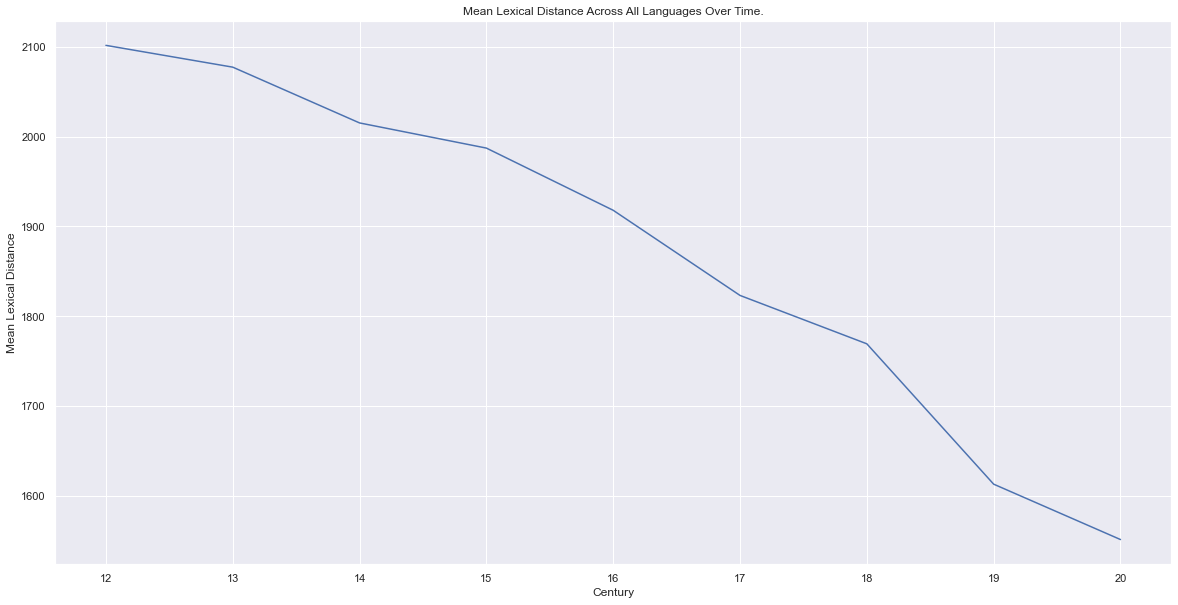

In [54]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()
size=(20,10)

d = {}
for i in range(12,21):
    d[i] = pd.read_csv(str(i)+'.csv',index_col = 0).mean().mean()
p = pd.DataFrame(d,index=['Mean lexiconal distance']).T.plot(figsize=size,legend=None)
p.set_xlabel('Century')
p.set_ylabel('Mean Lexical Distance')
p.set_title('Mean Lexical Distance Across All Languages Over Time.')
plt.show()

This pretty convincingly shows the effects of globalization and European colonialism, but given the large amount of European languages, I was curious to see if the same thrend is seen without including them

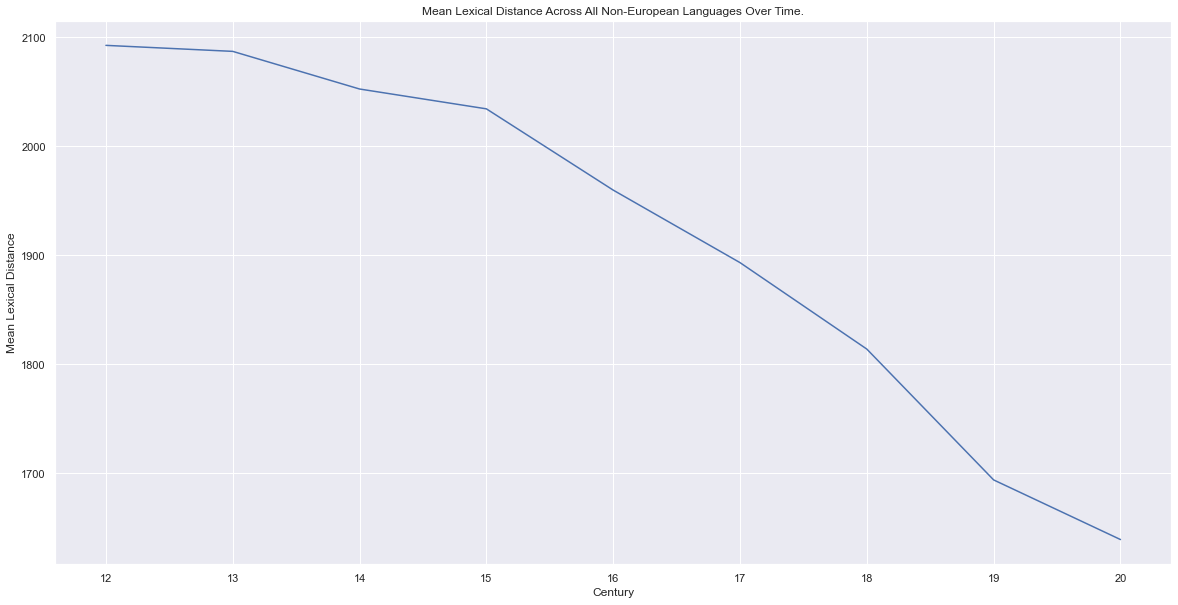

In [55]:
def is_european(language):
    family = wc_con.lang_fam_dict[wc_con.inv_lang_dict[language]]
    IE_not_euro = ('hindi','punjabi','kurdish') # non-European indo-european languages
    N_IE_euro = ('finnish','hungarian','basque','georgian') # European non-indo-european languages
    if ('European' in family and language not in IE_not_euro) or language in N_IE_euro:
        return True
    else:
        return False

euro = [lang for lang in pd.read_csv('12.csv',index_col = 0).index if is_european(lang)]

d = {}
for i in range(12,21):
    d[i] = pd.read_csv(str(i)+'.csv',index_col = 0).drop(euro).drop(euro,axis=1).mean().mean()
non_euro_mean_df = pd.DataFrame(d,index=['Mean lexiconal distance'])
p = non_euro_mean_df.T.plot(figsize=size,legend=None)
p.set_xlabel('Century')
p.set_ylabel('Mean Lexical Distance')
p.set_title('Mean Lexical Distance Across All Non-European Languages Over Time.')
plt.show()

## Foreign influence over time in English


In [56]:
#specific language effects
def show_lang_relationship(*lang):
    #lang must be give as 2-tuples or lists
    d = {}
    if len(lang) == 1:
        for i in range(12,21):
            d[i] = pd.read_csv(str(i)+'.csv',index_col = 0).loc[lang[0][0],lang[0][1]]
        p = pd.DataFrame(d,index=['Lexiconal distance']).T.plot(title='Lexiconal Distance Between {0} and {1}'.format(lang[0][0].capitalize(),lang[0][1].capitalize()),figsize=size)
        p.get_legend().remove()
        p.set_xlabel('Century')
        p.set_ylabel('Lexiconal Distance')
        plt.show()
    else:
        # init dict
        for i in range(12,21):
            d[i] = []
        index = []
        for l in lang:
            for i in range(12,21):
                d[i].append(pd.read_csv(str(i)+'.csv',index_col = 0).loc[l[0],l[1]])
            index.append('{0} and {1}'.format(l[0].capitalize(),l[1].capitalize()))
        p = pd.DataFrame(d,index=index).T.plot(title='Lexiconal Distance Between Select Languages',figsize=size)
        p.set_xlabel('Century')
        p.set_ylabel('Lexiconal Distance')

# Normans from France invading Germanic-Speaking England in the 11th century
![Normans from France invading Germanic-Speaking England in the 11th century](norman.jpg "Normans from France invading Germanic-Speaking England in the 11th century")

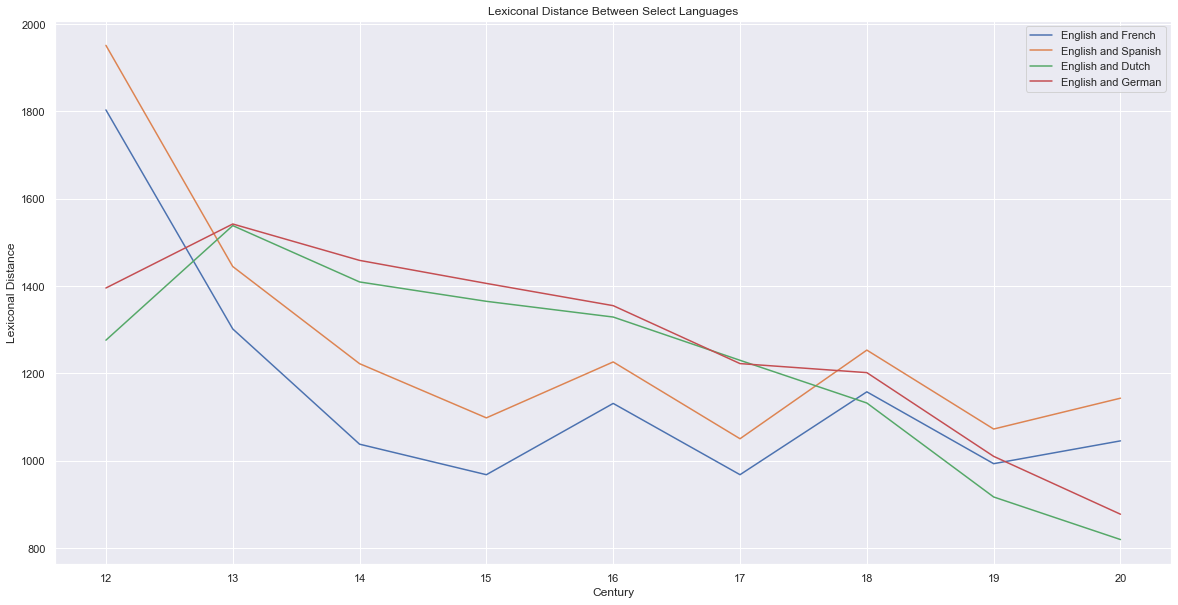

In [57]:
# Romance vs Germanic influence on English
show_lang_relationship(('english','french'),('english','spanish'),('english','dutch'),('english','german'))

# Cluster Analysis using Affinity propagation


In [58]:
from sklearn.cluster import AffinityPropagation as ap

def get_clusters(df,damping=0.5):
    aff = ap(damping=damping)
    aff.fit(df)
    clus = aff.predict(df)
    cluster_dict = {}
    for i in range(len(set(clus))):
        cluster_dict[i] = []
    for cluster, n in zip(clus,range(len(clus))):
        cluster_dict[cluster].append((df.index[n]))
    return cluster_dict

def print_cluster(cluster_dict):
    for cluster in cluster_dict.keys():
        print('Cluster #',cluster)
        for lang in cluster_dict[cluster]:
            print(lang.capitalize(),'['+wc_con.lang_fam_dict[wc_con.inv_lang_dict[lang]]+']')
        print()

for i in range(12,21):
    exec('century{0} = pd.read_csv(\'{0}\'+\'.csv\',index_col = 0)'.format(i))
centurytotal = century12 + century13 + century14 + century15 + century16 + century17 + century18 + century19 + century20
print_cluster(get_clusters(centurytotal))
            

Cluster # 0
Chinese [Sinitic (Sino-Tibetan)]
Japanese [Isolate]
Korean [Isolate]

Cluster # 1
Hungarian [Other Uralic]
Greek [Other Indo-European]
Finnish [Finnic (Uralic)]
Basque [Isolate]
Lithuanian [Baltic (Indo-European)]
Georgian [Kartvelian]
Albanian [Other Indo-European]

Cluster # 2
English [Germanic (Indo-European)]
French [Romance (Indo-European)]
Spanish [Romance (Indo-European)]
Italian [Romance (Indo-European)]
Romanian [Romance (Indo-European)]
Portuguese [Romance (Indo-European)]
Maltese [Semitic (Afro-Asiatic)]
Haitian creole [Romance (Indo-European)]

Cluster # 3
Turkish [Oghuz (Turkic)]
Amharic [Semitic (Afro-Asiatic)]
Uzbek [Karluk (Turkic)]
Mongolian [Isolate]
Armenian [Other Indo-European]

Cluster # 4
Arabic [Semitic (Afro-Asiatic)]
Swahili [Bantu (Niger–Congo)]
Yoruba [Volta–Niger (Niger–Congo)]
Hausa [Chadic (Afro-Asiatic)]
Maori [Oceanic (Austronesian)]
Somali [Cushitic (Afro-Asiatic)]
Khmer [Austroasiatic]

Cluster # 5
Thai [Kra–Dai]

Cluster # 6
Hindi [Indo-A

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


# Conclusion
- My metric is able to detect the trend towards lesser lexical distance between languages due to ever greater globalization
- It is also able to detect influences between languages and loan-word adoption
- Finally, it is able to detect "civilizational" differences between languages that go beyond genetic differences